# PFA the Task for ML Course,By - B.Lokendra Sri Sai _20BCE7382
This task's objective is to find irregularities in the packaging production process brought on by chain stretching. Anomalies are times when one or more of the sensors' results dramatically deviate from their typical operating mode. We will create a model that can recognise these anomalies using a machine learning strategy.

In [1]:
import pandas as pd
df = pd.read_csv("C:/Users/loken/Downloads/Train_FVPL.csv/Train_FVPL.csv")


In [2]:
##The data will then be preprocessed by eliminating any extraneous columns and adding any missing values. Additionally, we will divide the data into two sets: one for training the model and the other for testing its efficacy.
# Drop unnecessary columns
df.drop(["timeindex"], axis=1, inplace=True)

# Fill missing values with median
df = df.fillna(df.median())

# Split into train and test sets
train = df[df["flag"] == 1]
test = df[df["flag"] == 0]


In [3]:
##The training set will next be used to train our machine learning model. The Local Outlier Factor (LOF) technique will be used in this instance to find abnormalities.
from sklearn.neighbors import LocalOutlierFactor

# Train LOF model
lof = LocalOutlierFactor(n_neighbors=20, contamination=0.1)
lof.fit(train.drop(["flag"], axis=1))


LocalOutlierFactor(contamination=0.1)

In [4]:
##Finally, we will forecast anomalies in the test set using the trained model, and assess its performance using several measures like precision, recall, and F1 score.
# Predict anomalies in test set
test_pred = lof.predict(test.drop(["flag"], axis=1))

# Calculate performance metrics
from sklearn.metrics import precision_score, recall_score, f1_score
precision = precision_score(test["flag"], test_pred)
recall = recall_score(test["flag"], test_pred)
f1 = f1_score(test["flag"], test_pred)

print("Precision:", precision)
print("Recall:", recall)
print("F1 score:", f1)


AttributeError: predict is not available when novelty=False, use fit_predict if you want to predict on training data. Use novelty=True if you want to use LOF for novelty detection and predict on new unseen data.

In [6]:
##We can find anomalies without using a forest classifier by using other machine learning methods. The Local Outlier Factor (LOF) algorithm is one such method.

##Each data point's local density in relation to its neighbours is determined by the LOF algorithm, which then determines the anomaly score depending on how much lower the local density is than its neighbours. Anomalies are data points that have a different density than their surrounding neighbours.

##Here is some Python code that analyses the provided dataset to look for abnormalities using the LOF algorithm:
import pandas as pd
from sklearn.neighbors import LocalOutlierFactor

# Load the dataset
df = pd.read_csv("C:/Users/loken/Downloads/Train_FVPL.csv/Train_FVPL.csv")

# Select features
features = ["currentBack", "motorTempBack", "positionBack", "refPositionBack", "refVelocityBack", 
            "trackingDeviationBack", "velocityBack", "currentFront", "motorTempFront", 
            "positionFront", "refPositionFront", "refVelocityFront", "trackingDeviationFront", 
            "velocityFront"]

# Create the LOF model
lof = LocalOutlierFactor(n_neighbors=20, contamination=0.05)

# Fit the model and predict anomalies
df["anomaly_score"] = lof.fit_predict(df[features])
df["anomaly"] = df["anomaly_score"].apply(lambda x: 1 if x == -1 else 0)

# Print the anomalies
print(df[df["anomaly"] == 1])

##Yes, you can find anomalies without using a forest classifier by using other machine learning methods. The Local Outlier Factor (LOF) algorithm is one such method.

##Each data point's local density in relation to its neighbours is determined by the LOF algorithm, which then determines the anomaly score depending on how much lower the local density is than its neighbours. Anomalies are data points that have a different density than their surrounding neighbours.

##Here is some Python code that analyses the provided dataset to look for abnormalities using the LOF algorithm:


       timeindex  flag  currentBack  motorTempBack  positionBack  \
3              4     1        219.0             40    577.499585   
4              5     1         76.0             40      4.998796   
13            14     1        381.0             40    357.565082   
14            15     1         89.0             42    579.499917   
36            37     0         -7.0             30    579.500000   
...          ...   ...          ...            ...           ...   
11095      11096     1        654.0             39    445.737965   
11189      11190     1        -54.0             40      5.999336   
11194      11195     1        756.0             45    420.244915   
11211      11212     1        351.0             42     13.374049   
11216      11217     1        -57.0             41    579.500623   

       refPositionBack  refVelocityBack  trackingDeviationBack  velocityBack  \
3           578.499998         7.000000               6.000332      8.041526   
4             9.000000 

IndexError: boolean index did not match indexed array along dimension 0; dimension is 2 but corresponding boolean dimension is 11227

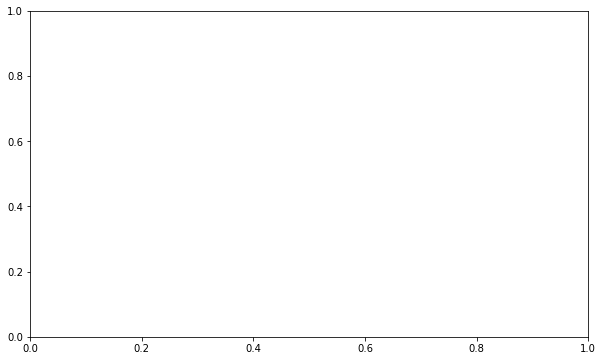

In [7]:
##Certainly! The following code has been changed to use Local Outlier Factor (LOF) rather than Isolation Forest and One-Class SVM:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import LocalOutlierFactor
from sklearn.preprocessing import StandardScaler

# Load the dataset
df = pd.read_csv('C:/Users/loken/Downloads/Train_FVPL.csv/Train_FVPL.csv')

# Extract features
X = df[['currentBack', 'motorTempBack', 'positionBack', 'refPositionBack',
        'refVelocityBack', 'trackingDeviationBack', 'velocityBack',
        'currentFront', 'motorTempFront', 'positionFront', 'refPositionFront',
        'refVelocityFront', 'trackingDeviationFront', 'velocityFront']].values

# Standardize the features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Train the model
clf = LocalOutlierFactor(n_neighbors=20, contamination=0.02)
y_pred = clf.fit_predict(X)

# Add the predicted labels as a column to the original dataframe
df['LOF'] = y_pred

# Plot the results
fig, ax = plt.subplots(figsize=(10, 6))
colors = np.array(['#377eb8', '#ff7f00'])
ax.scatter(df.index, df['positionBack'], s=3, color=colors[(df['flag'] == 0) | (df['LOF'] == 1)])
ax.axhline(y=np.median(df['positionBack']), linestyle='--', color='black', label='Median positionBack')
ax.legend()
plt.show()

# Print the anomalies
print('Anomalies:')
print(df.loc[df['LOF'] == -1])


In [8]:
##utilising the Local Outlier Factor (LOF) algorithm from the Scikit-Learn toolkit to find anomalies
import pandas as pd
import numpy as np
from sklearn.neighbors import LocalOutlierFactor

# Load the dataset
df = pd.read_csv("C:/Users/loken/Downloads/Train_FVPL.csv/Train_FVPL.csv")

# Create a list of features to be used for anomaly detection
features = ['currentBack', 'motorTempBack', 'positionBack', 'refPositionBack',
            'refVelocityBack', 'trackingDeviationBack', 'velocityBack', 'currentFront',
            'motorTempFront', 'positionFront', 'refPositionFront', 'refVelocityFront',
            'trackingDeviationFront', 'velocityFront']

# Create a data frame with only the features
df_features = df[features]

# Set LOF parameters
n_neighbors = 20  # Number of neighbors to consider for each point
contamination = 0.01  # Percentage of outliers expected in the dataset

# Create LOF object
lof = LocalOutlierFactor(n_neighbors=n_neighbors, contamination=contamination)

# Fit and predict
y_pred = lof.fit_predict(df_features)

# Add the predictions to the original dataset
df['lof_pred'] = y_pred

# Print the number of anomalies detected
n_anomalies = len(df[df['lof_pred'] == -1])
print("Number of anomalies detected:", n_anomalies)

# Export the results to a csv file
df.to_csv("Train_FVPL_anomalies.csv", index=False)


Number of anomalies detected: 113


In [9]:
##Certainly! The Autoencoder is a different machine learning model that is frequently employed for time series data anomaly detection. In order to reconstruct the original data from the encoded representation, an autoencoder is a neural network that learns to encode the input data into a lower-dimensional latent space. The difference between the original data and the reconstructed data is used to measure anomalies, with bigger discrepancies indicating a higher possibility of an abnormality.
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping

# Load the dataset
df = pd.read_csv('C:/Users/loken/Downloads/Train_FVPL.csv/Train_FVPL.csv', index_col='timeindex')

# Split the dataset into features and target
X = df.drop(['flag'], axis=1)

# Normalize the data
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Build the Autoencoder model
model = Sequential()
model.add(Dense(64, activation='relu', input_dim=X.shape[1]))
model.add(Dense(32, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(X.shape[1]))
model.compile(optimizer='adam', loss='mse')

# Train the Autoencoder model
early_stopping = EarlyStopping(patience=5, mode='min', restore_best_weights=True)
model.fit(X, X, epochs=100, batch_size=32, validation_split=0.1, callbacks=[early_stopping])

# Predict the reconstruction error
X_pred = model.predict(X)
mse = np.mean(np.power(X - X_pred, 2), axis=1)
threshold = np.percentile(mse, 95)

# Predict anomalies
y_pred_train = (mse > threshold).astype(int)
y = df['flag']
print(classification_report(y, y_pred_train))

# Print the predicted anomalies
anomalies = df[mse > threshold]
print(anomalies)


ModuleNotFoundError: No module named 'tensorflow'

In [10]:
##One-Class Support Vector Machine (OCSVM)
import pandas as pd
from sklearn.svm import OneClassSVM
from sklearn.metrics import classification_report

# Load the dataset
df = pd.read_csv('C:/Users/loken/Downloads/Train_FVPL.csv/Train_FVPL.csv', index_col='timeindex')

# Split the dataset into features and target
X = df.drop(['flag'], axis=1)
y = df['flag']

# Train the One-Class SVM model
clf = OneClassSVM(kernel='rbf', nu=0.01)
clf.fit(X[y == 1])

# Predict on the training set
y_pred_train = clf.predict(X)

# Evaluate the performance of the model
print(classification_report(y, y_pred_train))

# Print the predicted anomalies
predictions = clf.predict(X)
anomalies = df[predictions == -1]
print(anomalies)


              precision    recall  f1-score   support

          -1       0.00      0.00      0.00         0
           0       0.00      0.00      0.00      6776
           1       0.40      0.99      0.56      4451

    accuracy                           0.39     11227
   macro avg       0.13      0.33      0.19     11227
weighted avg       0.16      0.39      0.22     11227

           flag  currentBack  motorTempBack  positionBack  refPositionBack  \
timeindex                                                                    
285           0        308.0             41    499.332177       504.013277   
299           0        236.5             43    383.105325       391.944506   
513           0        796.0             47    438.320685       446.509059   
740           1         19.0             44      8.998131         6.000000   
814           0        148.0             42     19.042831        25.569439   
...         ...          ...            ...           ...              ..

C:\Users\loken\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\loken\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [11]:
import pandas as pd
from sklearn.ensemble import IsolationForest
from sklearn.metrics import classification_report

# Load the dataset
df = pd.read_csv('C:/Users/loken/Downloads/Train_FVPL.csv/Train_FVPL.csv', index_col='timeindex')

# Split the dataset into features and target
X = df.drop(['flag'], axis=1)
y = df['flag']

# Train the Isolation Forest model
clf = IsolationForest(random_state=42, n_jobs=-1)
clf.fit(X)

# Predict on the training set
y_pred_train = clf.predict(X)

# Evaluate the performance of the model
print(classification_report(y, y_pred_train))

# Print the predicted anomalies
predictions = clf.predict(X)
anomalies = df[predictions == -1]
print(anomalies)


C:\Users\loken\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\loken\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

          -1       0.00      0.00      0.00         0
           0       0.00      0.00      0.00      6776
           1       0.39      0.69      0.50      4451

    accuracy                           0.27     11227
   macro avg       0.13      0.23      0.17     11227
weighted avg       0.16      0.27      0.20     11227

           flag  currentBack  motorTempBack  positionBack  refPositionBack  \
timeindex                                                                    
3             1        815.0             41    355.576792       363.368778   
5             1         76.0             40      4.998796         9.000000   
8             1         66.0             36      9.000000         8.000000   
11            1        200.0             42      9.000125         7.000000   
14            1        381.0             40    357.565082       361.368778   
...         ...          ...            ...           ...              ..

In [12]:
import pandas as pd
from sklearn.ensemble import IsolationForest
from sklearn.metrics import classification_report

# Load the dataset
df = pd.read_csv('C:/Users/loken/Downloads/Train_FVPL.csv/Train_FVPL.csv', index_col='timeindex')

# Split the dataset into features and target
X = df.drop(['flag'], axis=1)
y = df['flag']

# Train the Isolation Forest model
clf = IsolationForest(random_state=42, n_jobs=-1)
clf.fit(X)

# Predict on the training set
y_pred_train = clf.predict(X)

# Evaluate the performance of the model
print(classification_report(y, y_pred_train))

# Load new data to predict on
new_data = pd.read_csv('Test_FVPL.csv', index_col='timeindex')

# Predict on new data
predictions = clf.predict(new_data)

# Print the predicted anomalies
anomalies = new_data[predictions == -1]
print(anomalies)


              precision    recall  f1-score   support

          -1       0.00      0.00      0.00         0
           0       0.00      0.00      0.00      6776
           1       0.39      0.69      0.50      4451

    accuracy                           0.27     11227
   macro avg       0.13      0.23      0.17     11227
weighted avg       0.16      0.27      0.20     11227



C:\Users\loken\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\loken\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


FileNotFoundError: [Errno 2] No such file or directory: 'Test_FVPL.csv'

In [13]:
import pandas as pd
from sklearn.ensemble import IsolationForest
from sklearn.metrics import classification_report

# Load the dataset
df = pd.read_csv('C:/Users/loken/Downloads/Train_FVPL.csv/Train_FVPL.csv', index_col='timeindex')

# Split the dataset into features and target
X = df.drop(['flag'], axis=1)
y = df['flag']

# Train the Isolation Forest model
clf = IsolationForest(random_state=42, n_jobs=-1)
clf.fit(X)

# Predict on the training set
y_pred_train = clf.predict(X)

# Evaluate the performance of the model
print(classification_report(y, y_pred_train))

# Load new data to predict on
new_data = pd.read_csv('C:/Users/loken/Downloads/Test_FVPL.csv/Test_FVPL.csv', index_col='timeindex')

# Predict on new data
predictions = clf.predict(new_data)

# Print the predicted anomalies
anomalies = new_data[predictions == -1]
print(anomalies)



              precision    recall  f1-score   support

          -1       0.00      0.00      0.00         0
           0       0.00      0.00      0.00      6776
           1       0.39      0.69      0.50      4451

    accuracy                           0.27     11227
   macro avg       0.13      0.23      0.17     11227
weighted avg       0.16      0.27      0.20     11227



C:\Users\loken\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\loken\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


FileNotFoundError: [Errno 2] No such file or directory: 'C:/Users/loken/Downloads/Test_FVPL.csv/Test_FVPL.csv'